In [1]:
import Embedding_Model as em
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from transformers import BertTokenizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# importing modules 
from torch import nn
from transformers import BertTokenizer, BertModel, BigBirdModel, LongformerModel , BertConfig,BigBirdTokenizer
import math
import gensim.downloader as api
from torch import nn
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import torch.nn.functional as F
from transformers import BertTokenizer, LongformerTokenizer
from bs4 import BeautifulSoup
from numpy.linalg import norm
from nltk import tokenize

In [4]:
# load data
data = pd.read_excel('UpdatedTenders.xlsx')

In [5]:
# initialize model and preprocesser 
model = em.Pretrained_model('bert')
preprocessor = em.Textprocessor(model="bert")

In [7]:
data['Description'] = data['Description'].apply(em.remove_html_tags)

In [8]:
data_list = list(data['Description'])

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yfr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
# get embeddings
output = []
c = 0
for item in data_list:
    output.append(em.preprocess_and_forward(item,preprocessor,model))
    
    c +=1
    if c % 100 ==0:
        print(c)
    if c == 1000:
        break

100
200
300
400
500
600
700
800
900
1000


In [11]:
len(output)

1000

In [12]:
em.preprocess_and_forward(data_list[0],preprocessor,model)

array([-5.03191411e-01,  4.85053539e-01,  1.59919322e-01, -1.64135486e-01,
       -3.70091051e-01,  1.07640281e-01,  1.10193300e+00,  6.27217233e-01,
        6.98964223e-02, -1.15784377e-01, -7.91921377e-01, -9.75385904e-01,
       -8.09935212e-01,  6.43575788e-01,  6.35607183e-01,  5.04795909e-02,
        4.13019955e-01,  4.06841785e-01,  4.27082092e-01, -4.03636515e-01,
       -1.70018330e-01, -2.57676452e-01, -3.82972121e-01, -7.29996562e-02,
        3.18183005e-01, -9.22517031e-02,  5.13313040e-02, -4.31421816e-01,
        8.07980061e-01,  2.19782457e-01,  2.42542356e-01, -1.47516012e-01,
       -5.33971548e-01,  9.16335210e-02,  9.65677053e-02, -1.96532309e-01,
        8.05885673e-01, -1.07626289e-01,  5.09679690e-02,  4.97223139e-01,
       -8.15702796e-01, -5.74770048e-02,  9.50424224e-02,  1.13518983e-01,
       -2.20920578e-01, -6.61940992e-01, -3.57106018e+00, -2.97929645e-01,
       -4.23535913e-01, -3.84775996e-01,  1.97901845e-01, -6.37335896e-01,
       -1.79672405e-01,  

In [13]:
preprocessor.tokenize_sentence(data_list[0])[0]

'The Customer requires a Contractor to provide bedding material made from Aspen and must be suitable for its rats and mice.'

In [22]:
output_reduced = []
pca = PCA(n_components=15)
pca.fit(output)
output_reduced = pca.transform(output)

In [23]:
print(output_reduced[0])

[ 2.42900528 -2.41544351 -1.17920889  0.56405071 -0.26325755  0.56360981
 -0.29056472  0.1171828  -0.595819   -0.22593427 -0.32424275  0.48226454
  0.40241555 -0.53336762  0.07106943]


In [24]:
import matplotlib.pyplot as plt

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

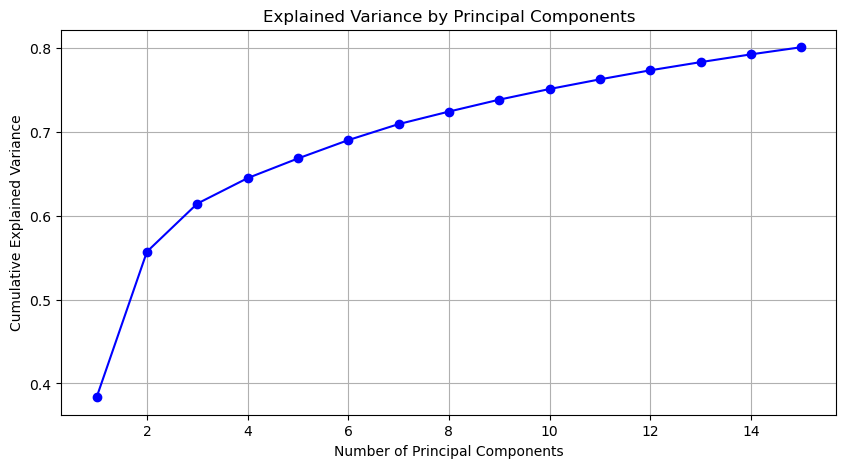

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

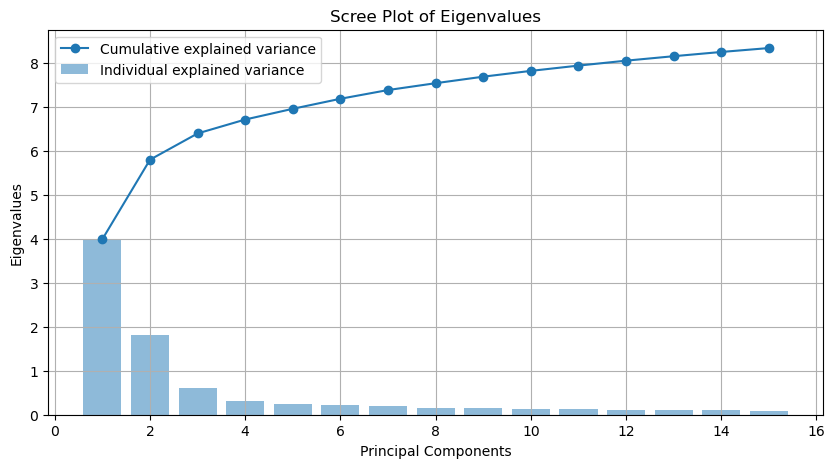

Total sum of eigenvalues: 8.333446123904768


In [27]:
# Compute eigenvalues
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, 16), eigenvalues, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(1, 16), np.cumsum(eigenvalues), marker='o', linestyle='-', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot of Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the total sum of eigenvalues
total_eigenvalues = np.sum(eigenvalues)
print(f"Total sum of eigenvalues: {total_eigenvalues}")


In [29]:
# Convert the 'output' list into a NumPy array
output = np.array(output)

# Calculate cosine similarities for all pairs of entries in the output matrix
output_shape = output.shape
output_normalized = output / np.linalg.norm(output, axis=1, keepdims=True)

# Calculate cosine similarities between all pairs of entries
similarities = np.zeros((output_shape[0], output_shape[0]))

# Calculate cosine similarities between all pairs of entries
for i in range(output_shape[0]):
    for j in range(output_shape[0]):
        similarities[i, j] = em.cosine_sim(output_normalized[i], output_normalized[j])

# Get the indices of the top 250 similarities (excluding self-similarity, which is 1)
top_indices = np.argpartition(similarities, -251, axis=None)[-251:-1]

# Print the top 250 similarities and their corresponding indices
for idx in top_indices:
    i, j = divmod(idx, output_shape[0])
    similarity = similarities[i, j]
    print(f"Similarity between entry {i} and entry {j}: {similarity}")


Similarity between entry 632 and entry 632: 1.0000001192092896
Similarity between entry 633 and entry 633: 1.0000001192092896
Similarity between entry 624 and entry 624: 1.0000001192092896
Similarity between entry 634 and entry 632: 1.0000001192092896
Similarity between entry 632 and entry 633: 1.0000001192092896
Similarity between entry 634 and entry 634: 1.0000001192092896
Similarity between entry 650 and entry 650: 1.0000001192092896
Similarity between entry 623 and entry 623: 1.0000001192092896
Similarity between entry 623 and entry 622: 1.0000001192092896
Similarity between entry 623 and entry 621: 1.0000001192092896
Similarity between entry 623 and entry 618: 1.0000001192092896
Similarity between entry 623 and entry 617: 1.0000001192092896
Similarity between entry 623 and entry 616: 1.0000001192092896
Similarity between entry 634 and entry 633: 1.0000001192092896
Similarity between entry 775 and entry 775: 1.0000001192092896
Similarity between entry 693 and entry 693: 1.000000119

In [38]:
least_similar_indices = np.unravel_index(np.argsort(similarities, axis=None)[:10], output_shape)

# Print the 10 pairs with the least similarities and their corresponding values
for k in range(10):
    i, j = least_similar_indices[0][k], least_similar_indices[1][k]
    similarity = similarities[i, j]
    print(f"Pair {k + 1}: Similarity between entry {i} and entry {j}: {similarity}")

Pair 1: Similarity between entry 472 and entry 705: 0.9180778861045837
Pair 2: Similarity between entry 262 and entry 147: 0.9408025741577148
Pair 3: Similarity between entry 224 and entry 331: 0.9124478101730347
Pair 4: Similarity between entry 472 and entry 676: 0.8961948156356812
Pair 5: Similarity between entry 473 and entry 367: 0.9768402576446533
Pair 6: Similarity between entry 822 and entry 67: 0.987675130367279
Pair 7: Similarity between entry 473 and entry 240: 0.904630184173584
Pair 8: Similarity between entry 656 and entry 555: 0.9659403562545776
Pair 9: Similarity between entry 472 and entry 675: 0.9779186844825745
Pair 10: Similarity between entry 223 and entry 99: 0.9891355633735657


In [30]:
# kmeans clustering
from sklearn.cluster import KMeans

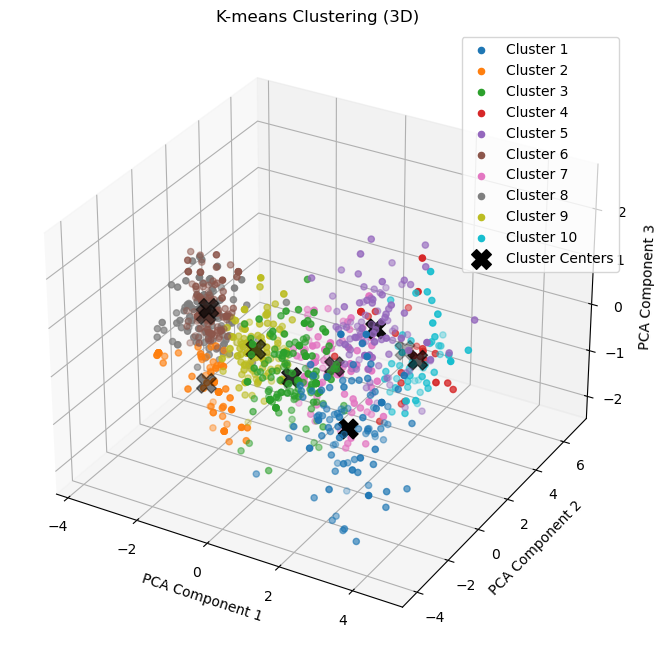

In [33]:
# Specify the number of clusters 
n_clusters = 10

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(output_reduced)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot the data points with color-coded cluster assignments
for cluster_id in range(n_clusters):
    ax.scatter(output_reduced[cluster_labels == cluster_id, 0],
               output_reduced[cluster_labels == cluster_id, 1],
               output_reduced[cluster_labels == cluster_id, 2],
               label=f'Cluster {cluster_id + 1}')

# Plot cluster centers in 3D
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           s=200, c='black', marker='X', label='Cluster Centers')

ax.set_title('K-means Clustering (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.grid(True)
plt.show()


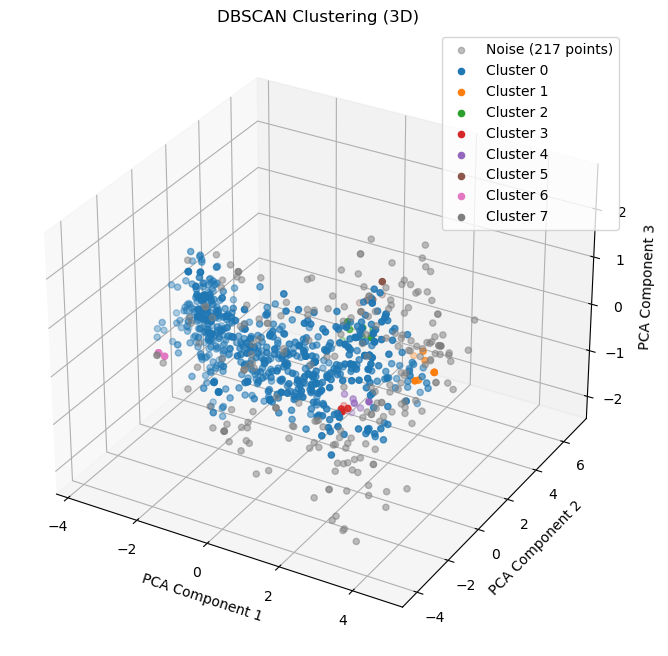

In [35]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.decomposition import PCA



# Specify the epsilon (eps) and minimum samples (min_samples) parameters
eps = 0.5 
min_samples = 5 

# Perform PCA to reduce the data to the first three principal components
pca = PCA(n_components=3)
output_reduced_3d = pca.fit_transform(output_reduced)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(output_reduced_3d)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot the data points with color-coded cluster assignments
unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    if label == -1:
        ax.scatter(output_reduced_3d[cluster_labels == label, 0],
                    output_reduced_3d[cluster_labels == label, 1],
                    output_reduced_3d[cluster_labels == label, 2],
                    label=f'Noise ({np.sum(cluster_labels == label)} points)',
                    c='gray', alpha=0.5)
    else:
        ax.scatter(output_reduced_3d[cluster_labels == label, 0],
                    output_reduced_3d[cluster_labels == label, 1],
                    output_reduced_3d[cluster_labels == label, 2],
                    label=f'Cluster {label}')

ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.grid(True)
plt.show()
